In [1]:
import numpy as np
import pandas as pd

## Example of Gaussian Naive Bayes

In [3]:
from sklearn.datasets import load_iris

# This provides us with the Features and the Corresponding Y Actual values
X, y = load_iris(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

# Let us Split the Data into Test and Train Segments
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
# As we have a Numerical Distribution in X so we use a GaussianNaiveBayes
from sklearn.naive_bayes import GaussianNB

In [6]:
gb = GaussianNB()
gb.fit(X_train, y_train)

# Running Prediction
y_pred = gb.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

<Axes: >

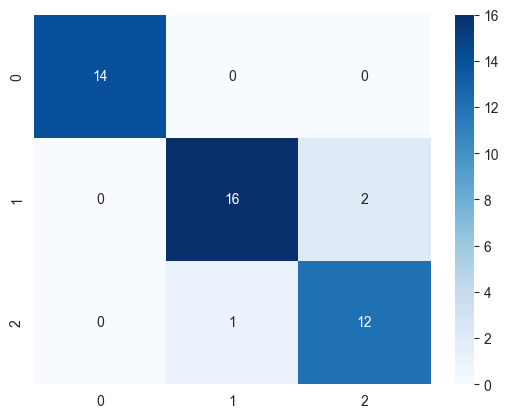

In [9]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [12]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
accuracy

0.93

# Working in a Different Dataset - Assignment

In [62]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [63]:
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()
# Encoding Data
df.sex = scaler.fit_transform(df['sex'])
df.time = scaler.fit_transform(df['time'])

In [64]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
std_scl.fit(df[['total_bill', 'tip']])
df[['total_bill', 'tip']] = std_scl.transform(df[['total_bill', 'tip']])

In [65]:
from sklearn.preprocessing import OneHotEncoder

# Encoding Data
df = pd.get_dummies(data=df, columns=['day'], prefix='day', drop_first=True, dtype=int)
df

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,-0.314711,-1.439947,0,No,0,2,0,0,1
1,-1.063235,-0.969205,1,No,0,3,0,0,1
2,0.137780,0.363356,1,No,0,3,0,0,1
3,0.438315,0.225754,1,No,0,2,0,0,1
4,0.540745,0.443020,0,No,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,1,No,0,3,0,1,0
240,0.832275,-0.722971,0,Yes,0,2,0,1,0
241,0.324630,-0.722971,1,Yes,0,2,0,1,0
242,-0.221287,-0.904026,1,No,0,2,0,1,0


In [66]:
X = df[['total_bill', 'tip', 'sex', 'time', 'size', 'day_Fri', 'day_Sat', 'day_Sun']]
y = df['smoker']
# Splitting data into Train and Test Dataset

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Modeling Part Starts here ...

------
## Using a Gaussian Model

In [67]:
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
gb = GaussianNB()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)

<Axes: >

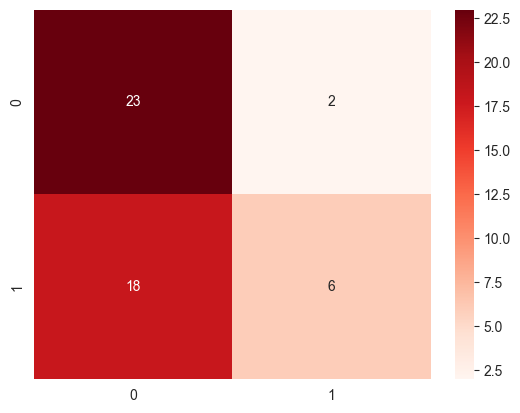

In [69]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

In [70]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.5918367346938775

## Using CategoricalNB

In [74]:
from sklearn.naive_bayes import BernoulliNB

<Axes: >

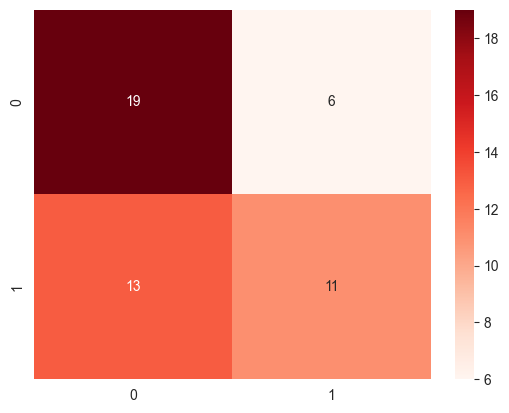

In [76]:
gb = BernoulliNB()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')


In [77]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.6122448979591837